# Linear Regression with Gradient Descent using Dataset from Kaggle

This notebook is done as an assignment to build from scratch Linear regression model using gradient descent cost function on a custom dataset.

I have chosen the dataset from Kaggle: https://www.kaggle.com/datasets/andonians/random-linear-regression/data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Load and Prepare Data

In [2]:
#Lets upload the train dataset
train = pd.read_csv('/content/LinearR_GD_train.csv')


In [3]:
#Check for details about the dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [4]:
#Needs to check for NULL value as its visible from the previous step
train[train['y'].isna()]

,x,y
213,3530.157369,NaN


In [5]:
#Dropping the ROW with Null value in any of the columns
train.dropna(inplace=True)

In [6]:
#Dropping the previous index and reindexing the DataFrame
train = train.reset_index(drop=True)

In [7]:
#And the result is
#RangeIndex: 699 entries, 0 to 698
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.0 KB


## Correlation

<Axes: xlabel='x', ylabel='y'>

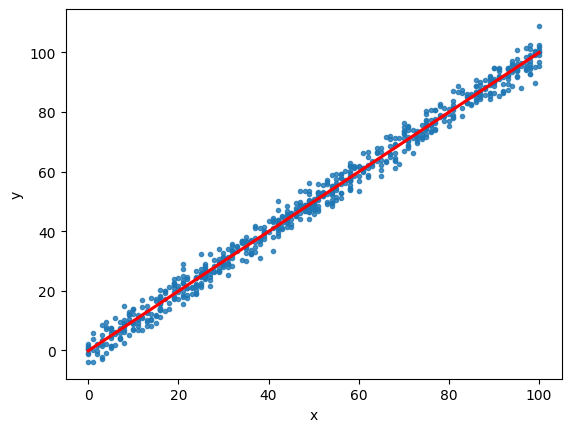

In [16]:
#Lets see the relationship between the feature and Target column of the dataset
#plt.scatter(train["x"], train["y"],s=5)
import seaborn as sns
sns.regplot(x="x", y="y", data=train, marker='.', line_kws={"color": "red"})

As expected, the feature and Target column shares a linear realtionship. Y increases as X increases.

## Gradient Descent - Defining Section

In [17]:
#This method computes the loss/cost/error by ->
#predicting y using the slope and intercept (intitally both set to 0)
#error in prediction = (predicted_y - actual_y)^2
#The error is summed up for all the datapoints
#its then divided with the number of datapoints to get the loss for
#that particular slope and intercept for the entire dataset
def compute_loss(x, y, slope, intercept):
    m = x.shape[0]
    total_loss = 0
    for i in range(m):
        y_pred = (slope * x[i]) + intercept
        total_loss = total_loss + (y_pred - y[i])**2

    #total_cost = (total_cost)/(2*m)
    total_loss = (total_loss/m)
    return total_loss

In [18]:
#Initialize slope and intercept
slope_init = 0
intercept_init = 0

#Lets check whats the loss at this slope and intercept
loss = compute_loss(train["x"], train["y"], slope_init, intercept_init)
print('loss for the dataset at slop and intercept at 0 is : ',loss)

loss for the dataset at slop and intercept at 0 is :  3340.12482617867


In [19]:
#This method computes the gradient for given slope and intercept
#This gradient value will be used to adjust to the current slope and intercept values
#to find the next slope and intercept value
def compute_gradient(x, y, slope, intercept):
    m = train.shape[0]
    d_slope = 0
    d_intercept = 0
    for i in range(m):
        y_pred = (slope * x[i]) + intercept
        d_slope = d_slope + (y_pred - y[i])*x[i]
        d_intercept = d_intercept + (y_pred - y[i])

    d_slope = (2*d_slope)/m
    d_intercept = (2*d_intercept)/m

    return d_slope, d_intercept

In [20]:
#This method is the core of the Cost Function - Gradient Descent
#It uses 2 Hyper parameters - Learning Rate and Number of Iterations
#The derivative/gradient of slope and intercept is calculated
#Then new slope and intercept values are obtained using the respective derivatives
#Loss/cost/error for prediction with the new slope and intercept is calculated
#The slope and intercept with less loss is captured
def gradient_descent(x, y, slope, intercept, lr, n_iter):
    m = x.shape[0]
    loss_list = []
    # Variables to track the minimum loss
    min_loss = float('inf')
    best_slope = 0
    best_intercept = 0
    for i in range(n_iter):
        d_slope, d_intercept = compute_gradient(x, y, slope, intercept)
        slope = slope - (lr * d_slope)
        intercept = intercept - (lr * d_intercept)
        loss = compute_loss(x, y, slope, intercept)
        loss_list.append(loss)
        # Check for minimum loss
        if loss < min_loss:
            min_loss = loss
            best_slope, best_intercept = slope, intercept

    return loss_list, best_slope, best_intercept

## Gradient Descent - Execution

In [21]:
# Hyperparameters of Gradient Descent - learning rate and Number of Iterations
lr = 0.0001
n_iterations = 100

#Finding the best slope and intercept for the dataset using Gradient Descent Cost Function
loss, slope_gd, intercept_gd = gradient_descent(train["x"], train["y"], slope_init, intercept_init, lr, n_iterations)

In [22]:
print('best slope : ',slope_gd)
print('best intercept : ',intercept_gd)


best slope :  0.9988343263437605
best intercept :  0.014352819895884914


## PLOT - Loss at each Iteration

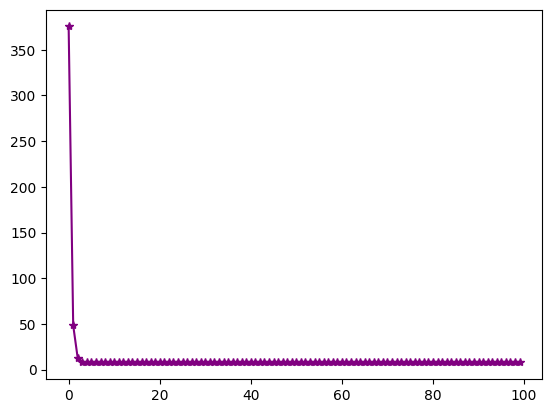

In [24]:
# Plotting the loss at each iterations
plt.plot(range(n_iterations), loss, color='purple',marker='*')

## Prediction on TRAIN dataset using the best slope and Intercept

In [26]:
m = train.shape[0]
predicted = np.zeros(m)
for i in range(m):
    predicted[i] = (slope_gd * train["x"][i]) + intercept_gd

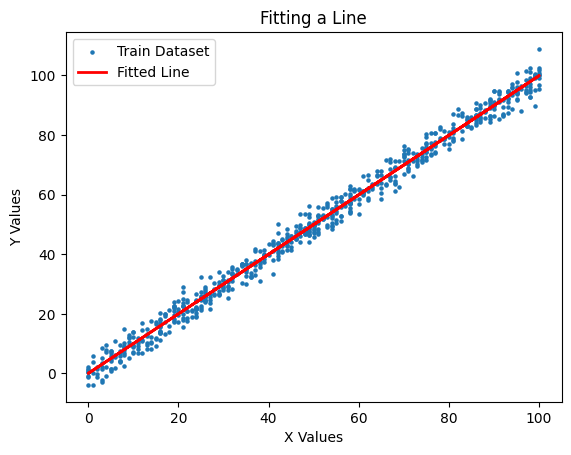

In [27]:
#Combining line and scatter plot
plt.scatter(train["x"], train["y"], s = 5, label = "Train Dataset")
plt.plot(train["x"], predicted, c = "red", linewidth = 2, label = "Fitted Line")
plt.title("Fitting a Line")
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.legend()
plt.show()

## Test DataSet

In [28]:
test =  pd.read_csv("/content/LinearR_GD_test.csv")


In [29]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       300 non-null    int64  
 1   y       300 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


## Prediction on Test Dataset using the Best Slope and Intercept from Train Dataset

In [30]:
test_m = test.shape[0]
test_prediction = np.zeros(test_m)
for i in range(test_m):
    test_prediction[i] = (slope_gd * test["x"][i]) + intercept_gd

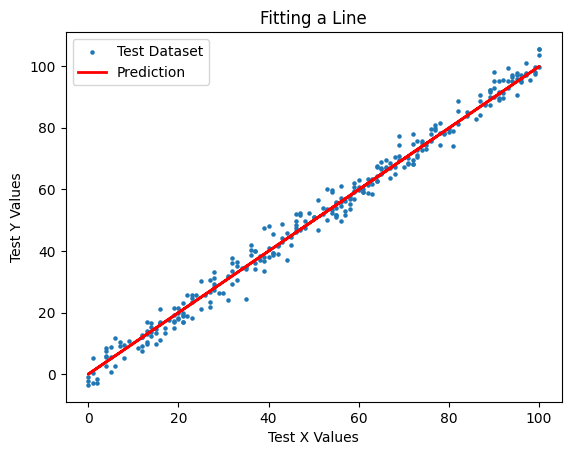

In [32]:
#Combining line and scatter plot
plt.scatter(test["x"], test["y"], s = 5, label = "Test Dataset")
plt.plot(test["x"], test_prediction, c = "red", linewidth = 2, label = "Prediction")
plt.title("Fitting a Line")
plt.xlabel("Test X Values")
plt.ylabel("Test Y Values")
plt.legend()
plt.show()

## Validation

In [33]:
#Mean Squared Error
error = 0
for i in range(test_m):
    error = error + (test["y"][i] - test_prediction[i])**2

error = error/test_m
print("Error found : ",error)

Error found :  9.457088807807887


In [34]:
#R-squared accuracy
err_n = 0
err_d = 0
mean_y_test = np.mean(test["y"])
print("Mean of actual values is : ",mean_y_test)
for i in range(test_m):
    err_n = err_n + (test["y"][i] - test_prediction[i])**2
    err_d = err_d + (test["y"][i] - mean_y_test)**2

fracn = err_n/err_d
acc = 1 - fracn
print("Model accuracy : ",acc)
print("Model accuracy in percent : ",acc*100)

Mean of actual values is :  51.20505109827666
Model accuracy :  0.9887727543636508
Model accuracy in percent :  98.87727543636508
